In [1]:
%pip install pycaret scikit-learn==1.2.2 yellowbrick schemdraw lightgbm scikit-plot --no-deps
%pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pycaret
pycaret.__version__

'3.0.4'

## Read Our New Merged CSV

This code is an initial step in a data analysis or manipulation process. It loads data from a CSV file into a Pandas DataFrame and provides an overview of the column names, which is essential for understanding and working with the dataset effectively. 

The loaded data can be further processed, analyzed, and visualized using various Pandas and data analysis techniques in Python.

In [5]:
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('/home/ubuntu/gridmet_test_run/all_merged_training.csv')
print(features.columns)
features.drop("date", axis=1, inplace=True)

Index(['date', 'lat', 'lon', 'swe_value', 'station_elevation', 'elevation',
       'aspect', 'curvature', 'slope', 'eastness', 'northness', 'etr', 'pr',
       'rmax', 'rmin', 'tmmn', 'tmmx', 'vpd', 'vs', 'lc_code', 'pmv', 'fSCA',
       'SnowClass'],
      dtype='object')


### check the data frame shape

In [6]:
features.shape

(7300, 22)

## Split the Data into Training and Testing

This is a typical step for the machine learning workflow, as it divides the dataset into training and testing subsets. The training set is used to train machine learning models, while the testing set is reserved for evaluating model performance. Monitoring the dimensions of these sets helps ensure that you have an appropriate amount of data for both training and evaluation, which is essential for effective model development and validation.

In [7]:
train_df = features[:6000]
test_df = features[6000:]
print('Data for Modeling: ' + str(train_df.shape))
print('Unseen Data For Predictions: ' + str(test_df.shape))

Data for Modeling: (6000, 22)
Unseen Data For Predictions: (1300, 22)


In [8]:
from pycaret.regression import *
exp_reg101 = setup(data = train_df, 
                   target = 'swe_value',
                   # imputation_type='iterative', 
                   fold_shuffle=True, 
                   session_id=123)

,Description,Value
0,Session id,123
1,Target,swe_value
2,Target type,Regression
3,Original data shape,"(6000, 22)"
4,Transformed data shape,"(6000, 22)"
5,Transformed train set shape,"(4200, 22)"
6,Transformed test set shape,"(1800, 22)"
7,Numeric features,21
8,Rows with missing values,75.4%
9,Preprocess,True


## Model Comparison

The compare_models function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [9]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,19.6895,1311.5140,36.1378,0.6911,1.1911,0.9943,0.0600
lightgbm,Light Gradient Boosting Machine,21.1641,1321.0886,36.2660,0.6897,1.3461,1.0327,1.2550
rf,Random Forest Regressor,20.3999,1356.4180,36.7378,0.6816,1.1921,1.0464,0.0990
gbr,Gradient Boosting Regressor,25.1263,1579.5023,39.6572,0.6288,1.6253,1.2723,0.0810
ridge,Ridge Regression,34.6036,2243.4927,47.3204,0.4716,2.1400,1.7140,0.1200
br,Bayesian Ridge,34.5643,2243.8361,47.3232,0.4716,2.1363,1.7078,0.0080
lr,Linear Regression,34.6134,2243.7517,47.3233,0.4715,2.1406,1.7154,0.1580
lasso,Lasso Regression,34.5833,2336.9484,48.2839,0.4503,2.0852,1.6117,0.1260
llar,Lasso Least Angle Regression,34.5833,2336.9507,48.2839,0.4503,2.0852,1.6117,0.0080
dt,Decision Tree Regressor,24.0790,2552.7819,50.4523,0.3970,1.3159,1.1028,0.0090


In [8]:
best

ExtraTreesRegressor(n_jobs=-1, random_state=123)

## Model Interpretation

You can get more details about why the best model is the best. PyCaret provides a function called interpret_model. It will produce a figure showing the influence of each input variable on the results. It is actually the same result of SHAP library and PyCaret integrates it.

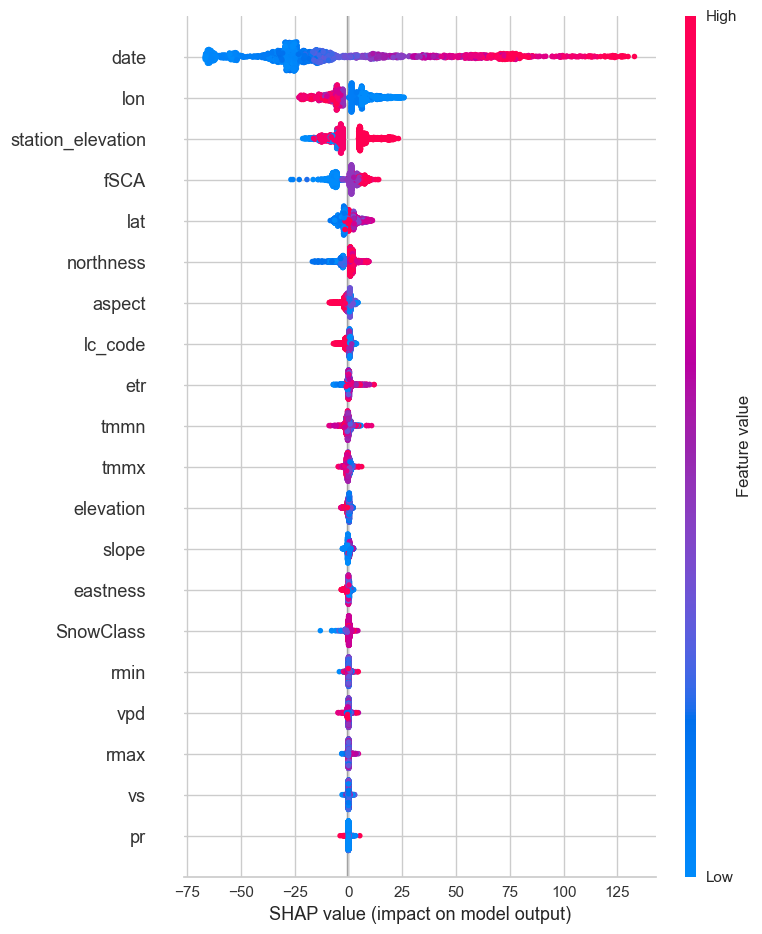

In [9]:
interpret_model(best)

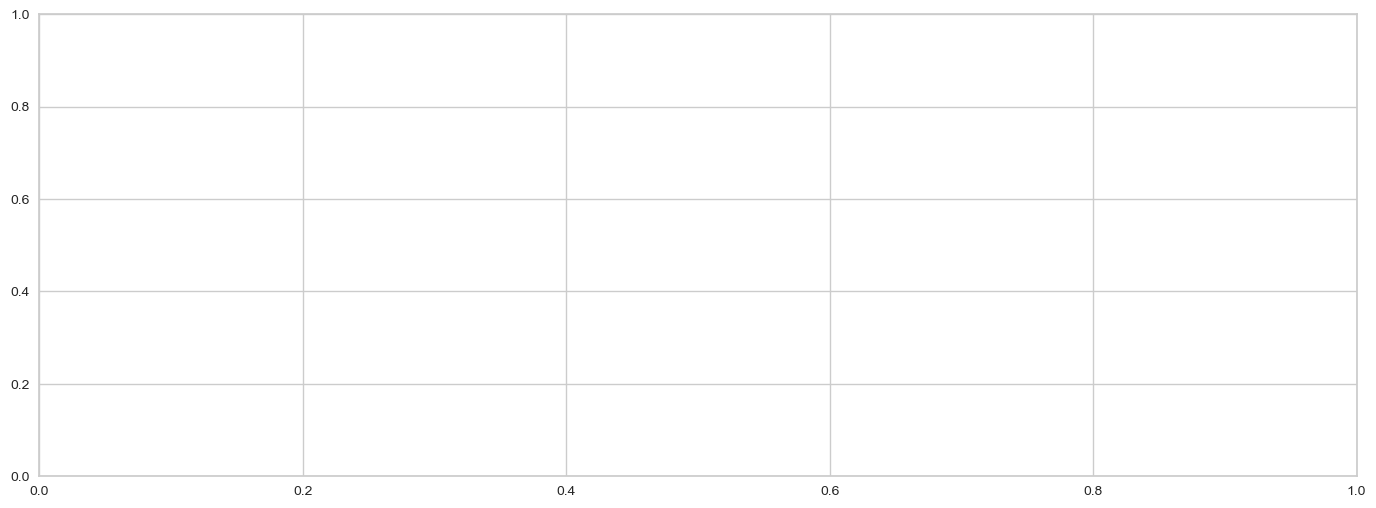

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [10]:
evaluate_model(best)